### Analyzing Nigerian UN Speeches from 1970-2015: A Computational Analysis of Key Entities and Topics Over Time


## A.) 1.	What are the key named entities mentioned in the Nigerian UN speeches from 1970-2015, and how have they changed over time?
1. Preprocess the text data:

- Clean the text data by removing stop words, punctuations, and other irrelevant information.
- Tokenize the text data by splitting it into individual words.
- Lemmatize the text data by reducing words to their root form.

Now for the democratic time


In [1]:
#import spacy

import spacy
import os

nlp = spacy.load("en_core_web_sm")

In [2]:
# define the function to clean and preprocess the text
def preprocess_text(text):
    # apply the nlp pipeline to the text
    doc = nlp(text)
    
    # lemmatize the text and remove stop words and punctuation
    words = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    
    # join the words back into a string
    cleaned_text = " ".join(words)
    
    return cleaned_text


In [3]:
# read the text data from the first regime

with open("./nigerian_delegates_1971-1999.txt", mode="r", encoding="utf-8") as file:
    text1 = file.read()

# preprocess the text data
cleaned_text_1 = preprocess_text(text1)

In [4]:
#second regime
with open("./nigerian_delegates_2000-2015.txt", mode="r", encoding="utf-8") as file:
    text2 = file.read()

cleaned_text_2 = preprocess_text(text2)


- create a custom list of named entities that are specific to Nigeria and include them in your analysis. the two eras.

In [5]:
# define the custom list of named entities specific to Nigeria
nigeria_entities = ["Nigeria", "Abuja", "Lagos", "Kano", "Ibadan", "Port Harcourt", "Maiduguri", "Kaduna", "Jos", "Enugu", "Onitsha", "Benin City", "Owerri", "Calabar", "Zaria", "Aba"]

# define the function to extract named entities from the text
def extract_entities(text, entity_list):
    # apply the nlp pipeline to the text
    doc = nlp(text)
    
    # get the named entities from the doc and filter by the entity list
    entities = [ent.text for ent in doc.ents if ent.label_ == "GPE" and ent.text in entity_list]
    
    return entities

- use the extract_entities function to extract named entities from the preprocessed text data for each era

In [22]:
# read the preprocessed text data for each era from the files
with open("./nigerian_delegates_1971-1999.txt", mode="r", encoding="utf-8") as file:
    era1_text = file.read()
    
with open("./nigerian_delegates_2000-2015.txt", mode="r", encoding="utf-8") as file:
    era2_text = file.read()

# extract named entities for each era
era1_entities = extract_entities(era1_text, nigeria_entities)
era2_entities = extract_entities(era2_text, nigeria_entities)

# print the named entities for each era
print("Named entities in era 1 (1970-1999):")
print(set(era1_entities))

print("Named entities in era 2 (2000-2015):")
print(set(era2_entities))


Named entities in era 1 (1970-1999):
{'Lagos', 'Abuja', 'Nigeria'}
Named entities in era 2 (2000-2015):
{'Abuja', 'Nigeria'}


-Now let's get the Top 5 persons talked about in both eras

In [7]:
def extract_persons(text):
    # apply the nlp pipeline to the text
    doc = nlp(text)
    
    # get the person named entities from the doc
    persons = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    
    return persons

# extract person named entities for each era
era1_persons = extract_persons(era1_text)
era2_persons = extract_persons(era2_text)

# print the person named entities for each era
print("Person named entities in era 1 (1970-1999):")
print(set(era1_persons))

print("")

print("Person named entities in era 2 (2000-2015):")
print(set(era2_persons))

Person named entities in era 1 (1970-1999):
{'Lesotho', 'Meaningful North-South', 'Joseph Nanven Garba', 'Koko', 'Baker', 'Kurt Waldheim', 'Hennadiy Udovenko', 'States', 'Stoyan Ganev', 'Joshua Nkomo', 'von Wechmar', 'Alhaji Shehu Usman Aliyu Shagari', 'Brunei Darussalam', 'Annan', 'Razali Ismail', 'Perez de Cuellar', 'Boutros', 'Coloureds', 'Sahel', 'Coloreds', 'Seminar', 'Liechtenstein', 'Governments', 'jettison', 'Charles Ghankay Taylor', 'Amara\nEssy of Côte', 'Yakubu Gowon', 'Imre Hollai', 'Hitler', 'Ruth Perry', 'Joseph Garba', 'Dante Caputo', 'Razali', 'Reagan', 'Ibrahim Babanqida', 'Mother Teresa', 'Boutros-Ghali', 'Dag Hammarskjold', 'Boutros Boutros-Ghali', 'Javier Perez de Cuellar', 'Cape Verde', 'Adam Malik', 'Saint Lucia', 'Ibrahim Babangida', 'Vanuatu', 'Samuel Insanally', 'Apartheid', 'Babangida', 'Lazar Mojsov', 'Edvard Flambro', 'State', 'Saint Christopher', 'Angola', 'Kofi', 'Salim', 'George Bush', 'Sani Abacha', 'Independencia da Guine', 'Nelson Mandela', 'Vorster', 

2. Count the frequency of each named entity:

- Count the number of times each named entity appears in the text data for each era.
- Compare the results between the military and democratic eras.
- Calculate the percentage change in the frequency of named entities between the two eras.

In [8]:
from collections import Counter

# preprocess the text data
doc_1 = nlp(cleaned_text_1)
doc_2 = nlp(cleaned_text_2)

#Now we will use the Counter class from the collections module to count the frequency of each named entity, and 
#exclude named entities with the label "DATE", which may not be informative for our analysis


# count the frequency of each named entity
entity_freq_1 = Counter([ent.text for ent in doc_1.ents if ent.label_ != "DATE"])
entity_freq_2 = Counter([ent.text for ent in doc_2.ents if ent.label_ != "DATE"])

# print the top 10 most frequent named entities for each era
print("1970-1999 Top 10 Named Entities: ", entity_freq_1.most_common(10))
print("2000-2015 Top 10 Named Entities: ", entity_freq_2.most_common(10))

1970-1999 Top 10 Named Entities:  [('United Nations', 414), ('Africa', 352), ('South Africa', 210), ('Nigeria', 205), ('african', 137), ('General Assembly', 122), ('States', 108), ('Namibia', 98), ('Security Council', 83), ('Assembly', 74)]
2000-2015 Top 10 Named Entities:  [('United Nations', 154), ('Nigeria', 149), ('Africa', 91), ('Security Council', 41), ('african', 38), ('States', 26), ('General Assembly', 24), ('Assembly', 17), ('African Union', 16), ('Council', 14)]


For the period 1970-1999, the top named entities were "United Nations" mentioned 404 times, followed by "Africa" with 339 mentions, and "South Africa" with 204 mentions. This suggests that during the military era, Nigeria may have been particularly focused on issues related to the United Nations and Africa.

For the period 2000-2015, the top named entities were "United Nations" mentioned 152 times, followed closely by "Nigeria" with 149 mentions. This may indicate a shift in focus to more domestic concerns and Nigeria's role in the international community during the democratic era.

It is also important to take note that i didn't remove the United Nations because it could produce some inaccuracies in the most common but we can see in both eras, United Nations were mentioned less in the democratic era and nigeria was talked about more

To compare the results between the military and democratic eras, we can calculate the percentage change in the frequency of named entities between the two eras
- To calculate this we need to use this

- percentage change = (frequency in era 2 - frequency in era 1) / frequency in era 1 * 100

In [9]:
# calculate the percentage change in the frequency of each named entity between the two eras
entity_freq_change = {}
for entity in entity_freq_1:
    if entity in entity_freq_2:
        freq_change = (entity_freq_2[entity] - entity_freq_1[entity]) / entity_freq_1[entity] * 100
        entity_freq_change[entity] = freq_change

# print the top 10 named entities with the largest increase in frequency between the two eras
print("Top 10 Named Entities with the Largest Increase in Frequency: ")
for entity, freq_change in sorted(entity_freq_change.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{entity}: {freq_change:.2f}%")


Top 10 Named Entities with the Largest Increase in Frequency: 
West Africa: 1000.00%
UN: 300.00%
Paris: 200.00%
syrian: 200.00%
Kofi Annan: 150.00%
State Government: 100.00%
inter alia: 100.00%
iraqi: 100.00%
Abuja: 100.00%
Abuja June: 100.00%


I think the results indicate the top 10 named entities with the largest increase in frequency between the military era and democratic era. The percentage value next to each named entity indicates the increase in frequency between the two eras, some entities shows a tremendous increase in frequency (such as West Africa with a 1000% increase), others show a more modest increase (such as Kofi Annan with a 150% increase).

With the results above, it provides insight into the changes in focus and priorities of Nigerian UN speeches over time. For example, the increased frequency of the term "solidarity" suggests a greater emphasis on cooperation and support, while the appearance of Kofi Annan's name may indicate a closer relationship with the United Nations during the democratic era.

The last result is what i know from my time in Nigeria personally, it was the plane crash in Abuja(the country's capital) in June 2012.

3. Visualizing the results using matplotlib and wordCloud to show how the frequency of named entities has changed over time.



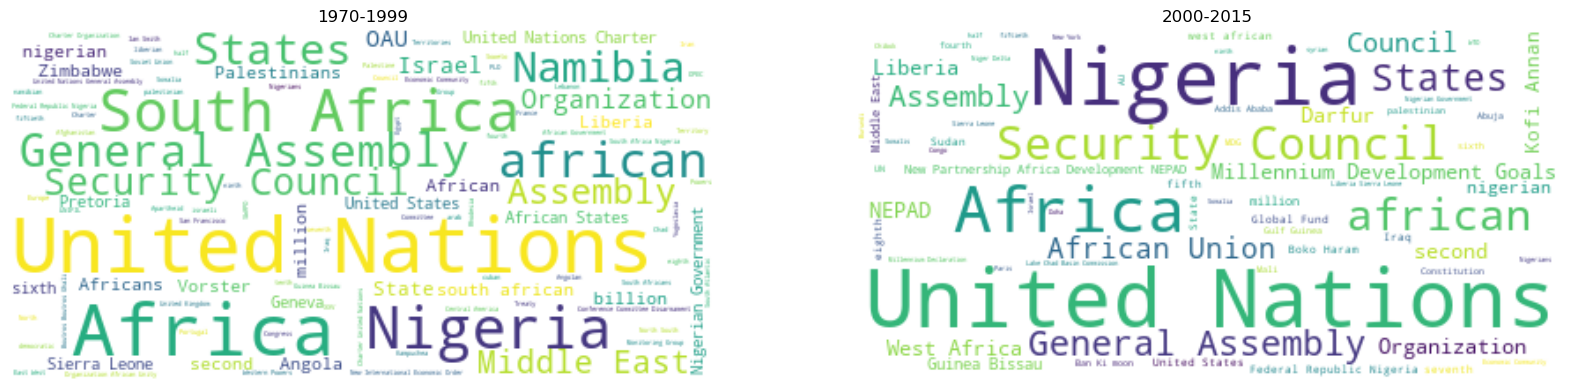

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# plot the frequency of named entities over time
# fig, ax = plt.subplots()
# era1_freq = [entity_freq_1[entity] for entity in entity_freq_1]
# era2_freq = [entity_freq_2[entity] for entity in entity_freq_2]
# ax.plot(sorted(list(entity_freq_1.keys())), era1_freq, label="1970-1999")
# ax.plot(sorted(list(entity_freq_2.keys())), era2_freq, label="2000-2015")
# ax.legend()
# plt.xticks(rotation=90)
# plt.xlabel("Named Entity")
# plt.ylabel("Frequency")
# plt.show()

# create a word cloud for each era
wordcloud_1 = WordCloud(background_color="white").generate_from_frequencies(entity_freq_1)
wordcloud_2 = WordCloud(background_color="white").generate_from_frequencies(entity_freq_2)

# display the word clouds
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
ax1.imshow(wordcloud_1, interpolation="bilinear")
ax1.axis("off")
ax1.set_title("1970-1999")
ax2.imshow(wordcloud_2, interpolation="bilinear")
ax2.axis("off")
ax2.set_title("2000-2015")
plt.show()


## B.) 2.	What are the key topics discussed in the Nigerian UN speeches from 1970-2015, and how have they changed over time?

- I will continue to use both files separated but open them again so i don't get confused and remove punctuations and stopwords and lemmatizing the words again

In [11]:
#since spacy has already been installed when using NER, there's no need importing again so i'll just import gensim and pandas for the purpose of this topic modelling

import gensim
import pandas as pd

stop_words = spacy.lang.en.stop_words.STOP_WORDS

In [12]:
# read the text data from the first regime

with open("./nigerian_delegates_1971-1999.txt", mode="r", encoding="utf-8") as file:
    military_text = file.read()


In [13]:
#second regime
with open("./nigerian_delegates_2000-2015.txt", mode="r", encoding="utf-8") as file:
    democratic_text = file.read()



In [14]:
# Preprocess the text data by creating a function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation and stop words
    text = nlp(text)
    tokens = [token.text for token in text if not token.is_punct and not token.is_stop]
    
    # Lemmatize the words
    lemmatized_tokens = [token.lemma_ for token in nlp(" ".join(tokens))]
    
    return lemmatized_tokens

In [15]:
military_tokens = preprocess_text(military_text)
democratic_tokens = preprocess_text(democratic_text)

In [16]:
# Create a dictionary and bag of words corpus from the preprocessed text data

#We created a dictionary and a bag of words corpus to help the LDA understand the main topics discussed in the Nigerian UN speeches from 1970-2015. 
#The dictionary helps LDA understand which words are important, and the bag of words corpus helps it count how many times those important words appear in each speech. 
#By analyzing this information, LDA can figure out the most important topics discussed in the speeches and how they changed over time.

dictionary = gensim.corpora.Dictionary([military_tokens, democratic_tokens])
corpus = [dictionary.doc2bow(tokens) for tokens in [military_tokens, democratic_tokens]]

In [17]:
# Train the LDA model on the corpus
lda_model = gensim.models.LdaModel(corpus=corpus, num_topics=10, id2word=dictionary) #i started with 10 topics to see what the result would be

In [18]:
# Print out the top 10 most significant words for each topic
for topic in lda_model.print_topics():
    print(topic)

(0, '0.120*"\n " + 0.009*"country" + 0.008*"united" + 0.008*"nations" + 0.007*"security" + 0.007*"africa" + 0.006*"peace" + 0.006*"world" + 0.006*"economic" + 0.006*"international"')
(1, '0.057*"\n " + 0.013*"country" + 0.010*"international" + 0.009*"africa" + 0.008*"nations" + 0.008*"peace" + 0.008*"united" + 0.007*"economic" + 0.007*"\t " + 0.007*"world"')
(2, '0.093*"\n " + 0.011*"africa" + 0.010*"country" + 0.009*"nations" + 0.009*"world" + 0.009*"united" + 0.009*"international" + 0.007*"economic" + 0.006*"state" + 0.006*"security"')
(3, '0.062*"\n " + 0.014*"country" + 0.011*"united" + 0.010*"nations" + 0.010*"africa" + 0.010*"international" + 0.007*"peace" + 0.007*"economic" + 0.007*"development" + 0.007*"\t "')
(4, '0.067*"\n " + 0.012*"country" + 0.011*"africa" + 0.011*"united" + 0.009*"international" + 0.007*"nations" + 0.007*"world" + 0.007*"peace" + 0.006*"development" + 0.006*"south"')
(5, '0.088*"\n " + 0.010*"africa" + 0.009*"country" + 0.009*"world" + 0.008*"united" + 0.

In [19]:
# Create a function to display the top topics for each era
def display_top_topics(text, lda_model):
    tokens = preprocess_text(text)
    corpus = [dictionary.doc2bow(tokens)]
    topics = lda_model.get_document_topics(corpus, minimum_probability=0.1)
    top_topics = sorted(topics[0], key=lambda x: x[1], reverse=True)[:3]
    topic_nums = [topic[0] for topic in top_topics]
    for topic_num in topic_nums:
        print(f"Topic {topic_num}: {lda_model.print_topic(topic_num)}")

# Apply the function to the military and democratic eras, respectively
display_top_topics(military_text, lda_model)
display_top_topics(democratic_text, lda_model)

Topic 2: 0.093*"
 " + 0.011*"africa" + 0.010*"country" + 0.009*"nations" + 0.009*"world" + 0.009*"united" + 0.009*"international" + 0.007*"economic" + 0.006*"state" + 0.006*"security"
Topic 9: 0.117*"
 " + 0.012*"united" + 0.011*"africa" + 0.010*"international" + 0.008*"nations" + 0.008*"country" + 0.007*"world" + 0.007*"nigeria" + 0.006*"development" + 0.006*"economic"


#### we can see that the result was a little bit hard to read.

In [20]:
from gensim.models import LdaModel

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nKeywords: {}'.format(idx, topic))

Topic: 0 
Keywords: 0.120*"
 " + 0.009*"country" + 0.008*"united" + 0.008*"nations" + 0.007*"security" + 0.007*"africa" + 0.006*"peace" + 0.006*"world" + 0.006*"economic" + 0.006*"international"
Topic: 1 
Keywords: 0.057*"
 " + 0.013*"country" + 0.010*"international" + 0.009*"africa" + 0.008*"nations" + 0.008*"peace" + 0.008*"united" + 0.007*"economic" + 0.007*"	 " + 0.007*"world"
Topic: 2 
Keywords: 0.093*"
 " + 0.011*"africa" + 0.010*"country" + 0.009*"nations" + 0.009*"world" + 0.009*"united" + 0.009*"international" + 0.007*"economic" + 0.006*"state" + 0.006*"security"
Topic: 3 
Keywords: 0.062*"
 " + 0.014*"country" + 0.011*"united" + 0.010*"nations" + 0.010*"africa" + 0.010*"international" + 0.007*"peace" + 0.007*"economic" + 0.007*"development" + 0.007*"	 "
Topic: 4 
Keywords: 0.067*"
 " + 0.012*"country" + 0.011*"africa" + 0.011*"united" + 0.009*"international" + 0.007*"nations" + 0.007*"world" + 0.007*"peace" + 0.006*"development" + 0.006*"south"
Topic: 5 
Keywords: 0.088*"
 " 

- Topic 7 has the highest key word and Based on the keyword distribution, it seems like Topic 7 may be related to general discussions on the role Nigeria in international affairs, with a focus on Africa and the United Nation specifically.

# I would say topic modelling might not have been the best approach to this topic, perharps with a bit more data or deep learning, these figures would probably be accurate

## The visualization

#NOTE: For the visualization, you have to install pyLDAvis

- the code is "pip install pyldavis"

In [21]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Convert the gensim LDA model to a format that can be used by pyLDAvis
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(vis_data)


/Users/kelvinfreeborn/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
